In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import pathlib
import json
sns.set(font_scale=1.5, style='whitegrid')
pd.set_option('display.max.columns', 999)

output_dir = pathlib.Path("./report/")
output_dir.mkdir(parents=True, exist_ok=True)

# Evaluacion de estado de experimentos

In [63]:
is_path = "./data/is_experiments"
p = pathlib.Path(is_path)
ignore = ["test.csv"]
all_results = pd.DataFrame()
files = []
for i in p.glob('**/*.csv'):
    if not i.name  in (ignore):
        partial = pd.read_csv(i.absolute())
        partial['file'] = i.name
        all_results = pd.concat([all_results, partial], ignore_index = True)
        files.append(i.name)


In [3]:
assert (all_results.groupby('file')['lshMEthod'].apply(lambda x: pd.isnull(x).sum()).sum(), 0)

In [5]:
def checks_params(df, filen, isMethod, lshMEthod,imbalance, ifis='IS'):
    check = df[(df.file == filen) & \
    (df.instanceSelection==ifis) & (df.isMethod == isMethod) & \
    (df.lshMEthod==lshMEthod) & (df.imbalance==imbalance)].groupby(['k', 'trees', 'depth', "ands", "ors"])['timeLSH'].count()

    assert(check[check.values!=2].sum(), 0)
    return(check)

checks = checks_params(all_results, "fraudkAllResults.csv", "entropy", "hyperplanes", False)
complete_aux_params = checks.reset_index()[['k', 'trees', 'depth', "ands", "ors"]].drop_duplicates()
complete_aux_params.to_csv(output_dir / "complete_aux_params.csv", index = False)

In [61]:
def checks_params_complete(df, filen, isMethod, lshMEthod,imbalance, ifis='IS'):

    auxs_params = ['k', 'trees', 'depth', "ands", "ors"]
    complete_aux_params= pd.read_csv(output_dir / "complete_aux_params.csv")
    complete_aux_params['aux'] = 1
    check = df[(df.file == filen) & \
    (df.instanceSelection==ifis) & (df.isMethod == isMethod) & \
    (df.lshMEthod==lshMEthod) & (df.imbalance==imbalance)].groupby(auxs_params)['timeLSH'].count()
    if(check.shape[0]==0):
        print(f"** missing experiments for file {filen}, {isMethod}, {lshMEthod}, imabalance = {imbalance}")
        return(None)
    else:
        assert(check[check.values!=2].sum(), 0)
        check = pd.merge(check, complete_aux_params, how = 'right', on = auxs_params)
        if (check.timeLSH.isnull().sum()>0):
            print("**** missing aux params")
            print("**** following params are missing")
            print(json.dumps(check[check.timeLSH.isnull()][auxs_params].to_dict(orient = "records"), indent=1, sort_keys=True))
            print("****")
        else:
            print(f"*All OK!!!!! for {filen}, {isMethod},{lshMEthod}, {imbalance}")
        

        return(check)


In [62]:

lshMEthods = ['hyperplanes', 'hyperplanes-projection', 'projection']
isMEthod = ['entropy','drop3']
combinations = [(x,y,z) for x in lshMEthods for y in files for z in isMEthod]


for lsh, isOrNis, isM in combinations:


def completeIS(dfToComplete):
    
    combinations = [(x,y,z) for x in lshMEthods for y in isOrNis for z in isMEthod]
    
    for lsh, isOrNis, isM in combinations:
        print(lsh, isOrNis, isM)
        
        


checks = checks_params_complete(all_results, "p2pAllResults.csv", "drop3", "hyperplanes", False)

** missing experiments for file p2pAllResults.csv, drop3, hyperplanes, imabalance = False


## Comparacion entre metodos desde el punto de vista  del numero de cubetas

In [2]:
def plotBuckets(df):
    fil = (df['instanceSelection'] == 'IS') & (df['type'] == 'Train')

    df_pb_to_plot = df[fil].copy()

    plot = sns.relplot(x="ands", y="buckets",height = 6, aspect=2,
                   data=df_pb_to_plot, kind="line",ci=10,
                   palette='gist_gray', style = 'lshMEthod', linewidth=3.5, 
                       hue = 'lshMEthod')

In [3]:
pd.read_csv("data/pageblocksAllResults.csv")

,instanceSelection,lshMEthod,sizeBucket,ands,ors,imbalance,neigh,subBuckets,distance,isMethod,...,Gmean,wtdAcc,AreaROC,timeLSH,timeIS,buckets,buckMax,buckMin,buckAvg,reduction
0,NOIS,hyperplanes,0.1,2,1,True,4,1000,6,entropy,...,92.380694,93.286827,0.986460,0.099970,0.369256,4.0,2263.0,83.0,1083.000000,0.506925
1,NOIS,hyperplanes,0.1,2,1,True,4,1000,6,entropy,...,88.124241,86.942142,0.940830,0.099970,0.369256,4.0,2263.0,83.0,1083.000000,0.506925
2,IS,hyperplanes,0.1,2,1,True,4,1000,6,entropy,...,88.289279,92.145433,0.988629,0.099970,0.369256,4.0,2263.0,83.0,1083.000000,0.506925
3,IS,hyperplanes,0.1,2,1,True,4,1000,6,entropy,...,90.123272,89.864852,0.908729,0.099970,0.369256,4.0,2263.0,83.0,1083.000000,0.506925
4,NOIS,hyperplanes,0.1,2,1,True,4,1000,6,entropy,...,93.366499,94.799144,0.991338,0.044755,0.299321,4.0,2135.0,250.0,1083.000000,0.516390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,IS,hyperplanes-projection,0.1,10,1,True,4,1000,6,drop3,...,86.942478,85.082258,0.925803,0.180426,0.159219,3898.0,8.0,1.0,1.112878,0.911019
8096,IS,hyperplanes-projection,0.1,10,1,True,4,1000,6,drop3,...,94.002320,96.413432,0.995471,0.205102,0.179030,3907.0,10.0,1.0,1.110315,0.911941
8097,IS,hyperplanes-projection,0.1,10,1,True,4,1000,6,drop3,...,84.618102,81.918638,0.949180,0.205102,0.179030,3907.0,10.0,1.0,1.110315,0.911941
8098,IS,hyperplanes-projection,0.1,10,1,True,4,1000,6,drop3,...,93.844525,96.324311,0.994382,0.223762,0.156427,3801.0,13.0,1.0,1.141279,0.889119


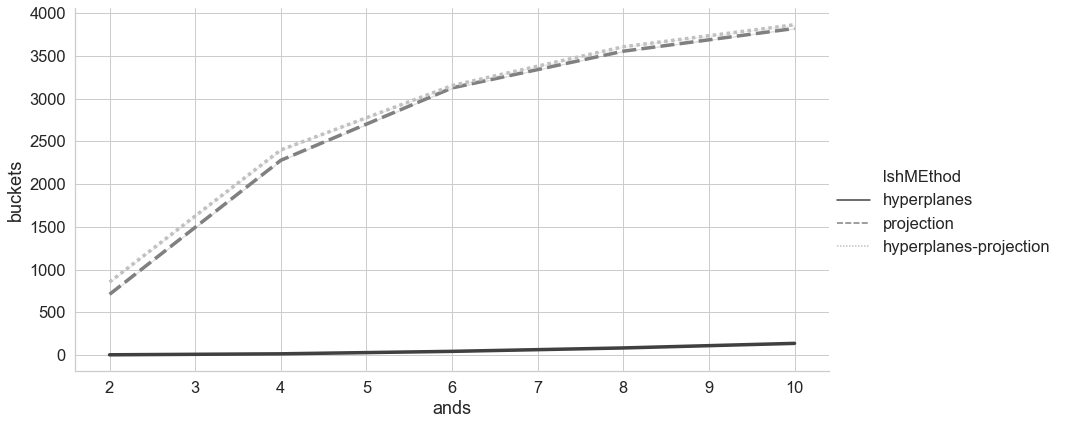

In [4]:
%matplotlib inline 
plotBuckets(pd.read_csv("data/pageblocksAllResults.csv"))

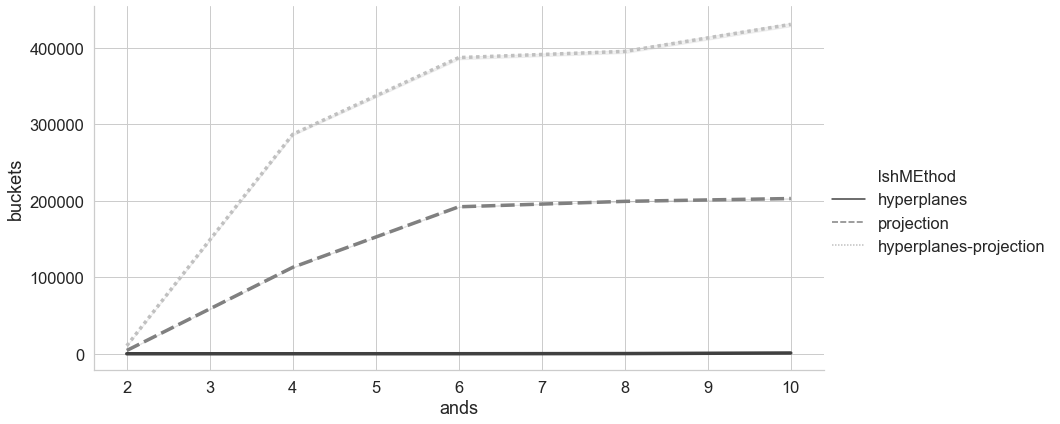

In [5]:
plotBuckets(pd.read_csv("data/fraudkAllResults.csv"))

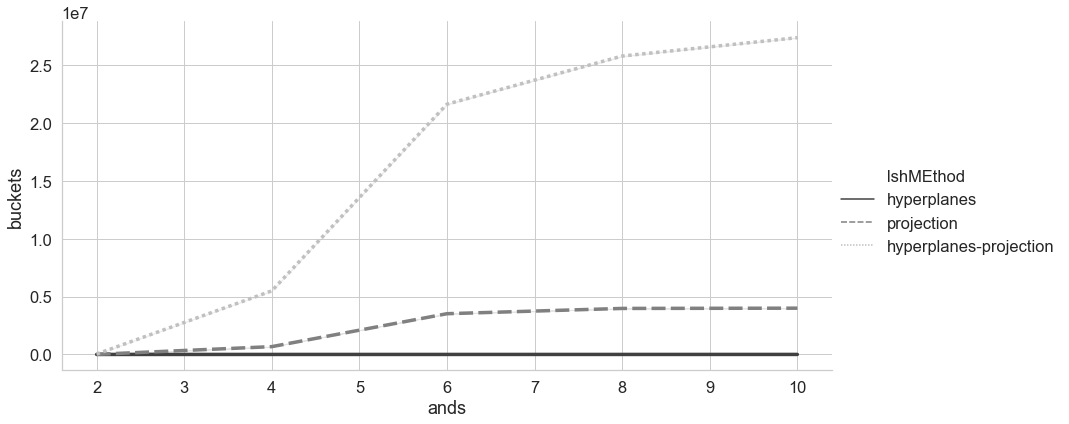

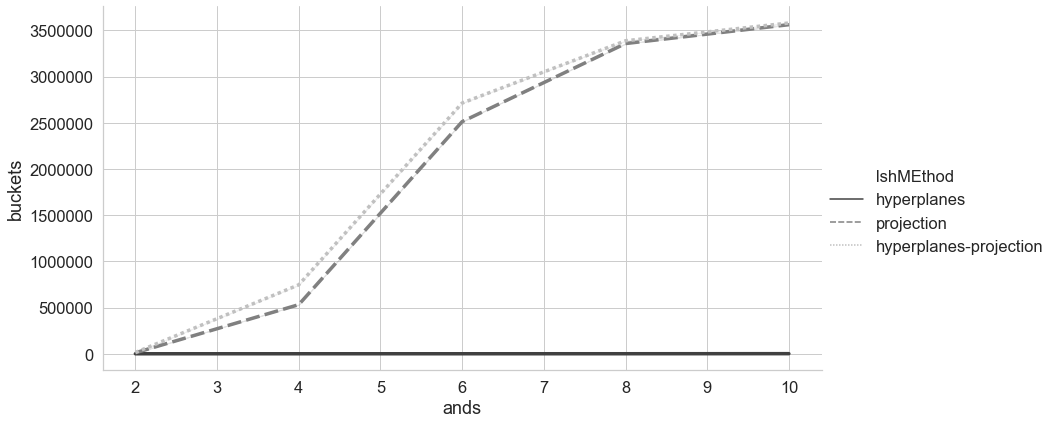

In [6]:
plotBuckets(pd.read_csv("data/susyAllResults.csv"))
plotBuckets(pd.read_csv("data/p2pAllResults.csv"))

## Comparacion entre metodos desde el punto de vista  de la reducciòn

In [7]:
def plotReduction(df):
    fil = (df['instanceSelection'] == 'IS') & (df['type'] == 'Train')

    df_pb_to_plot = df[fil].copy()
    
    df_pb_to_plot['Reduction of DataSet(%)'] = (1 - df_pb_to_plot['reduction'])*100.0

    plot = sns.relplot(x="ands", y="Reduction of DataSet(%)", height = 6, aspect=2, data=df_pb_to_plot, 
                       kind="line",ci=10,palette='gist_gray', style = 'lshMEthod', 
                       linewidth=3.5, hue = 'lshMEthod', col = 'isMethod')

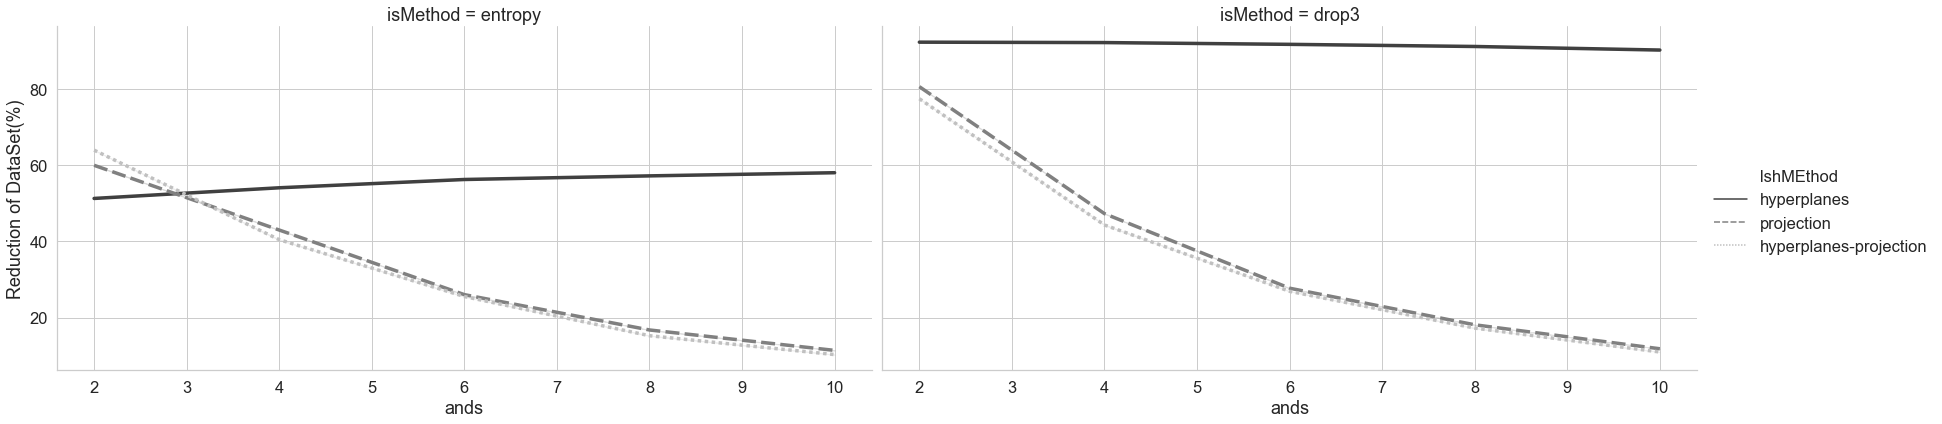

In [8]:
plotReduction(pd.read_csv("data/pageblocksAllResults.csv"))

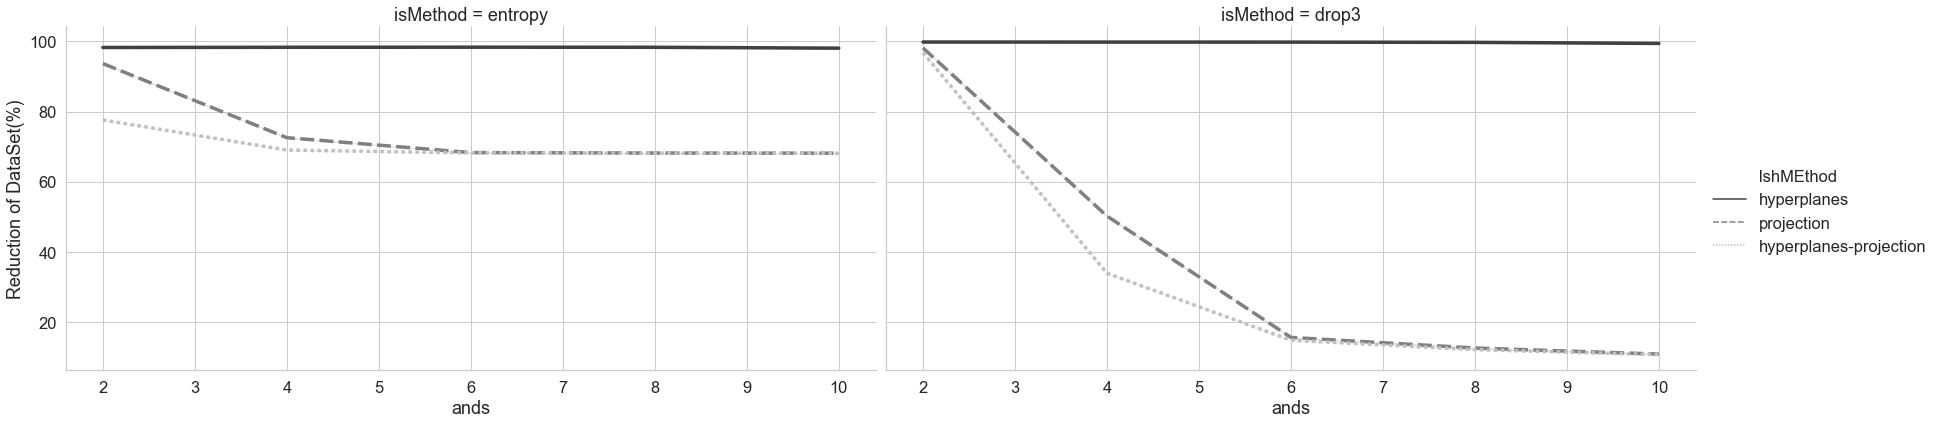

In [9]:
plotReduction(pd.read_csv("data/fraudkAllResults.csv"))

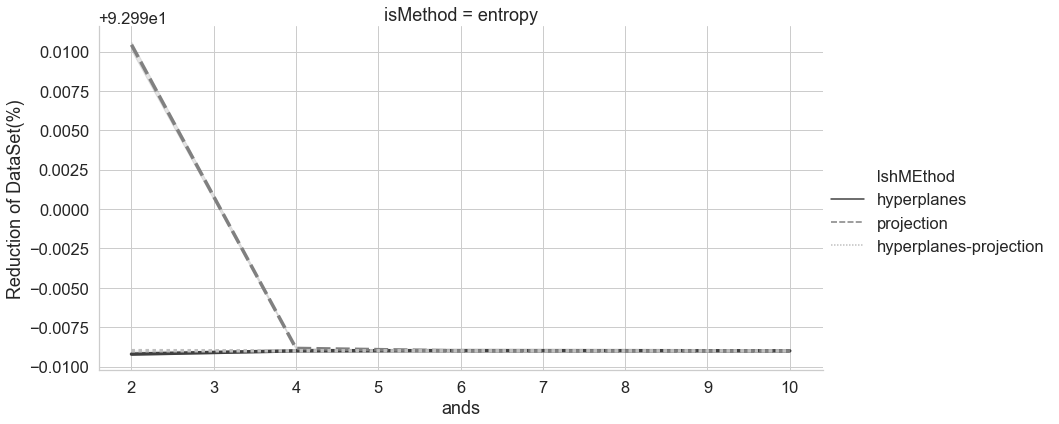

In [10]:
plotReduction(pd.read_csv("data/susyAllResults.csv"))

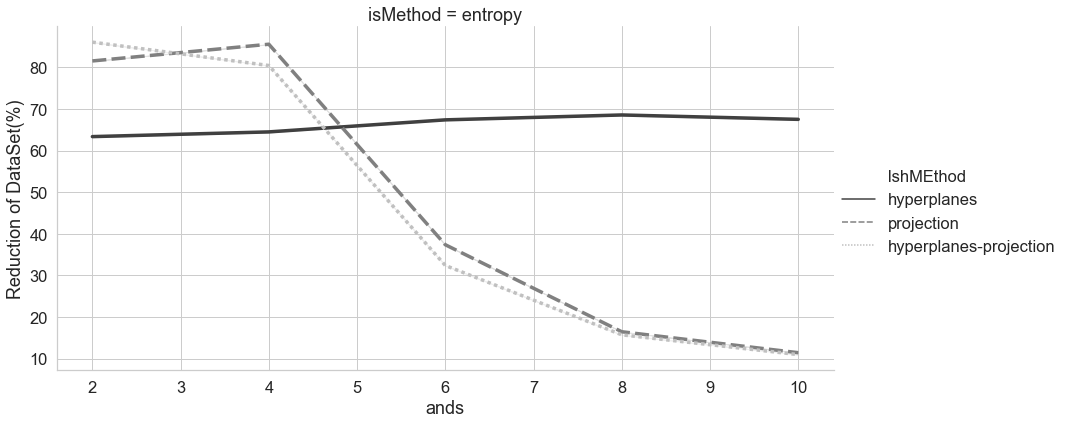

In [11]:
plotReduction(pd.read_csv("data/p2pAllResults.csv"))

### Comparacion entre metodos desde el punto de vista del performances

In [12]:
resultsNOIS = pd.read_csv("data/rfPageBlocks.csv")
fil = (resultsNOIS['type'] == 'Test')
resultsNOIS = resultsNOIS[fil].copy()

In [13]:
len(resultsNOIS)

45

In [14]:
resultsIS = pd.read_csv("data/pageblocksAllResults.csv")
fil = (resultsIS['type'] == 'Test') & (resultsIS['instanceSelection'] == 'IS') & (resultsIS['imbalance'] == True)
resultsIS = resultsIS[fil].copy()

In [15]:
resultsIS.head()

,instanceSelection,lshMEthod,sizeBucket,ands,ors,imbalance,neigh,subBuckets,distance,isMethod,...,Gmean,wtdAcc,AreaROC,timeLSH,timeIS,buckets,buckMax,buckMin,buckAvg,reduction
3,IS,hyperplanes,0.1,2,1,True,4,1000,6,entropy,...,90.123272,89.864852,0.908729,0.099970,0.369256,4.0,2263.0,83.0,1083.0,0.506925
7,IS,hyperplanes,0.1,2,1,True,4,1000,6,entropy,...,92.084519,92.804642,0.904925,0.044755,0.299321,4.0,2135.0,250.0,1083.0,0.516390
11,IS,hyperplanes,0.1,2,1,True,4,1000,6,entropy,...,90.949934,91.061443,0.935781,0.069430,0.328243,4.0,2657.0,99.0,1083.0,0.512927
15,IS,hyperplanes,0.1,2,1,True,4,1000,6,entropy,...,91.328130,91.640950,0.922400,0.039840,0.519558,4.0,2258.0,92.0,1083.0,0.505309
19,IS,hyperplanes,0.1,2,1,True,4,1000,6,entropy,...,91.725097,92.233141,0.926957,0.034702,0.365504,4.0,2402.0,167.0,1083.0,0.507387


In [16]:
len(resultsIS)

1350

In [42]:
lshMEthods = ['hyperplanes', 'hyperplanes-projection', 'projection']
isOrNis = ['IS', 'NOIS']
isMEthod = ['entropy','drop3']
combinations = [(x,y,z) for x in lshMEthods for y in isOrNis for z in isMEthod]

def completeIS(dfToComplete):
    
    combinations = [(x,y,z) for x in lshMEthods for y in isOrNis for z in isMEthod]
    
    for lsh, isOrNis, isM in combinations:
        print(lsh, isOrNis, isM)
        
        

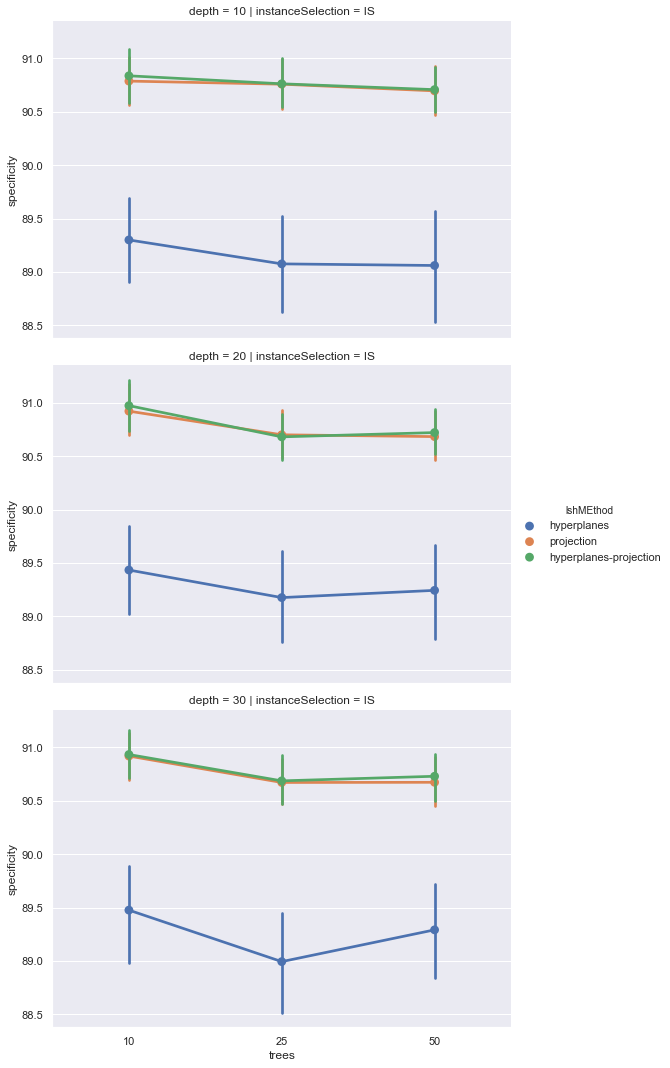

In [45]:
fil = (resultsIS['type'] == 'Test')
df_pb_to_plot = resultsIS[fil].copy()
sns.factorplot(x="trees", y="specificity", hue="lshMEthod", col="instanceSelection", row = "depth",
               aspect=1.5,
                kind="point", data=resultsIS)


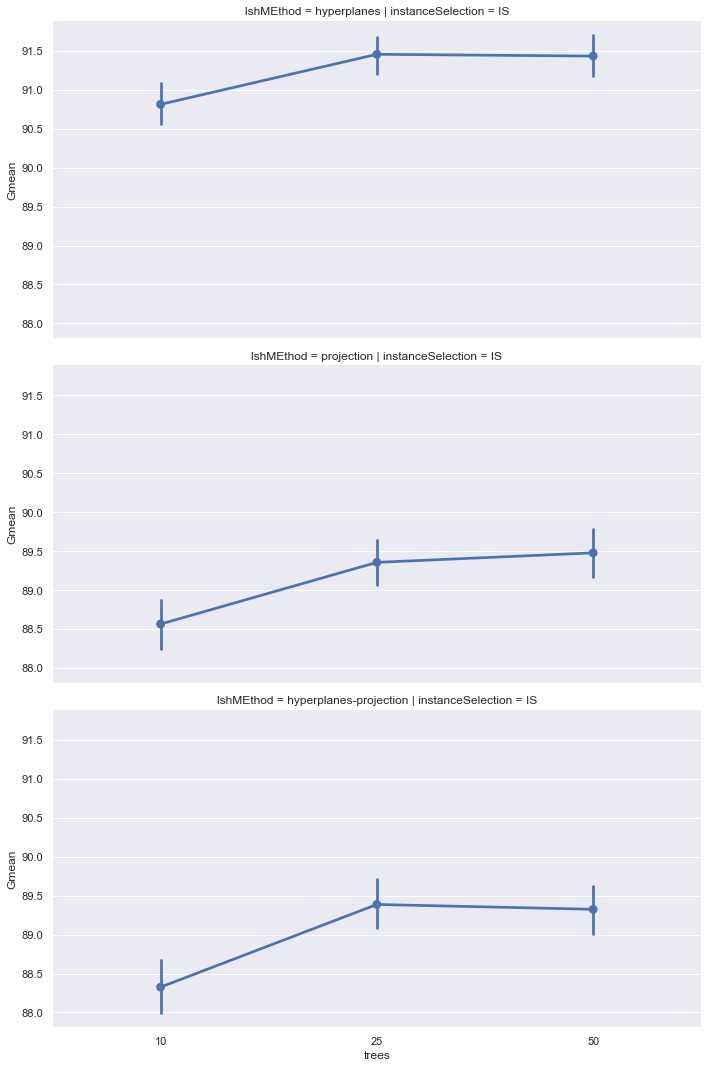

In [46]:
sns.catplot(x="trees", y="Gmean", col="instanceSelection", row = "lshMEthod",
               aspect=2,
                kind="point", data=df_pb_to_plot)

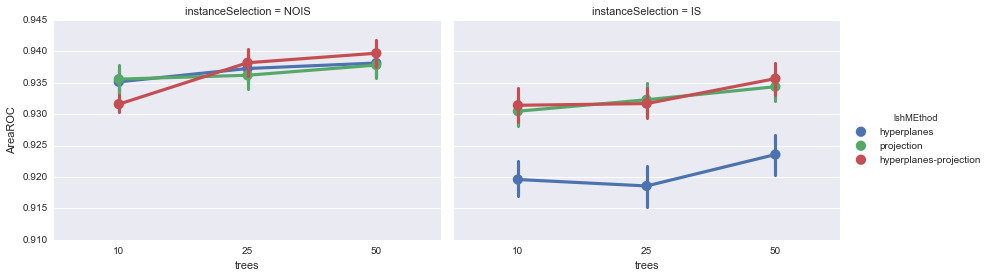

In [85]:
fil = (df_pb['type'] == 'Test')
df_pb_to_plot = df_pb[fil].copy()
sns.factorplot(x="trees", y="AreaROC", hue="lshMEthod", col="instanceSelection",
                height=16, aspect=1.5,
                kind="point", data=df_pb_to_plot)



## Fraud Kaggle

In [28]:
df_pb_kaggle = pd.read_csv("originals/fraudkEntropy.csv")

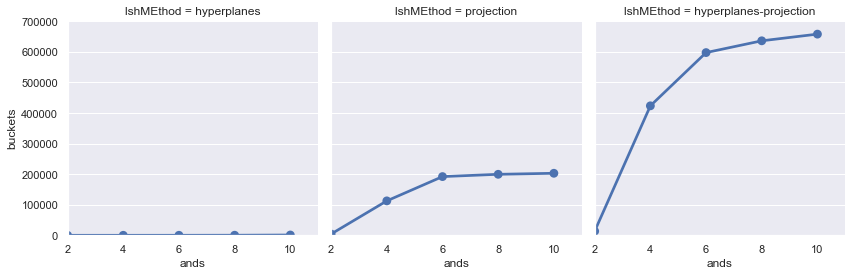

In [37]:
%matplotlib inline 
import seaborn as sns
sns.set(style='darkgrid')

fil = (df_pb_kaggle['instanceSelection'] == 'IS') & (df_pb_kaggle['type'] == 'Train')

df_pb_to_plot_k = df_pb_kaggle[fil].copy()

plot = sns.factorplot(x="ands", y="buckets", col="lshMEthod",
                height=4, kind="point", data=df_pb_to_plot_k )

for axs in plot.axes:
    for axu in axs:
        axu.set_ylim(0, None)
        axu.set_xlim(0, None)

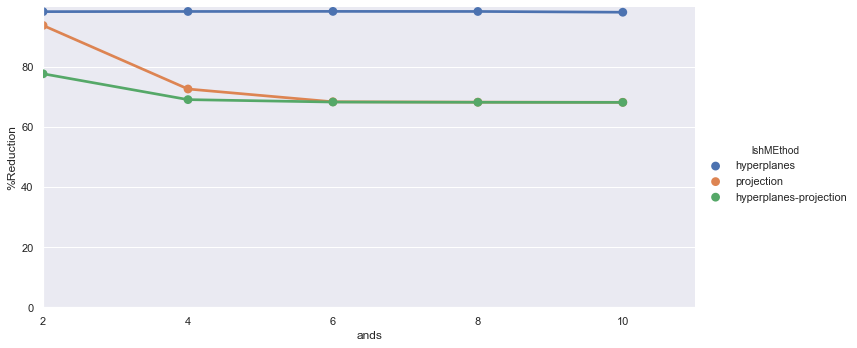

In [40]:
df_pb_kaggle['%Reduction'] = 100.0 - 100.0*df_pb_kaggle['reduction']

fil = (df_pb_kaggle['instanceSelection'] == 'IS') & (df_pb_kaggle['type'] == 'Train')

df_pb_to_plot_k = df_pb_kaggle[fil].copy()

# Draw a pointplot to show pulse as a function of three categorical factors
plot = sns.factorplot(x="ands", y="%Reduction", hue="lshMEthod", 
                height=5, aspect = 2,
                kind="point", data=df_pb_to_plot_k )

for axs in plot.axes:
    for axu in axs:
        axu.set_ylim(0, None)
        axu.set_xlim(0, None)

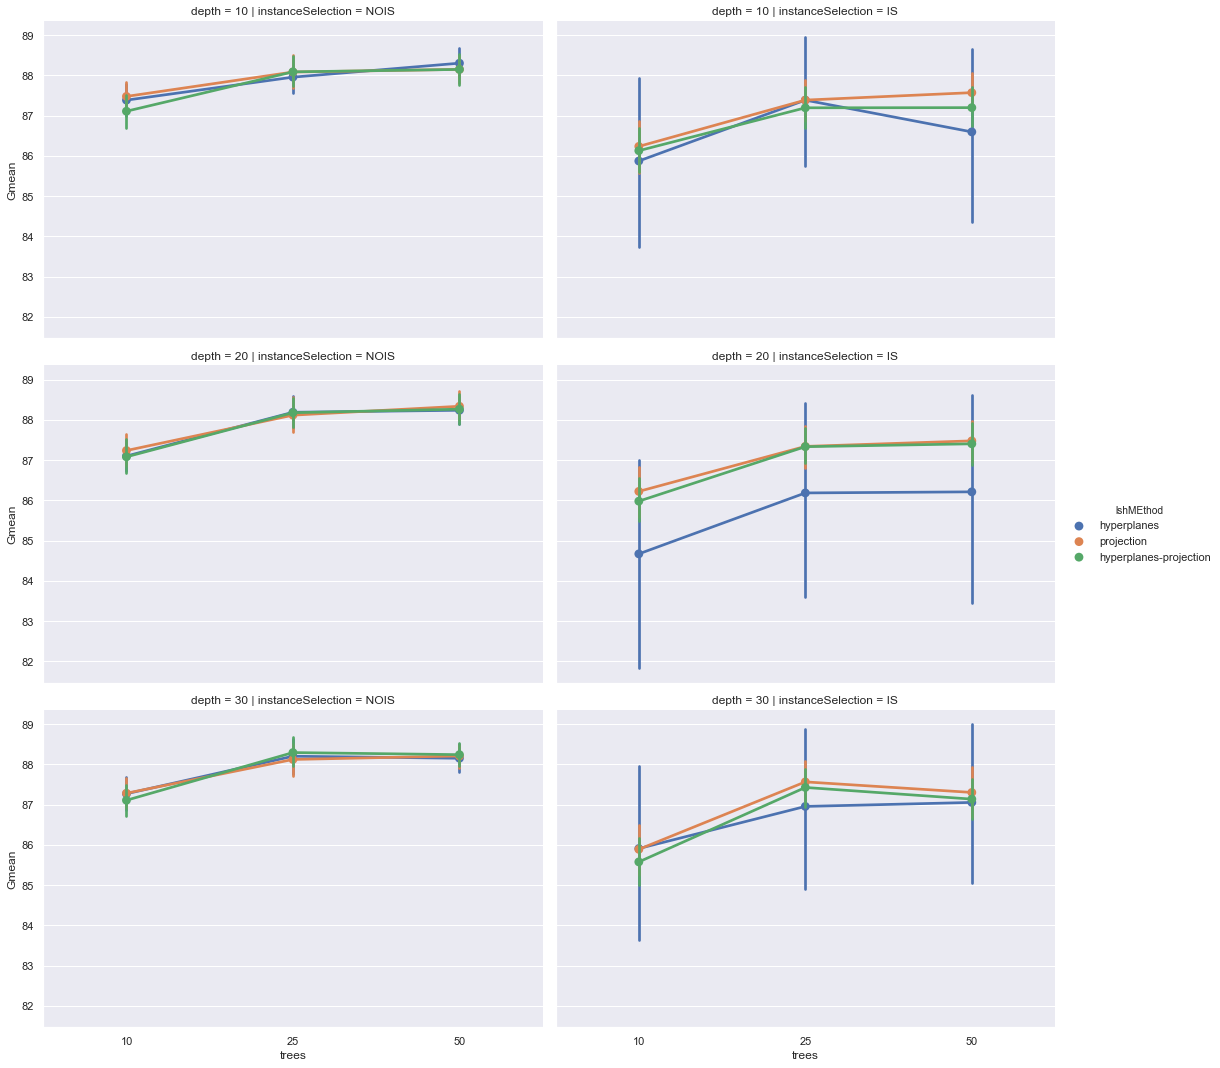

In [39]:
fil = (df_pb_kaggle['type'] == 'Test')
df_pb_to_plot_k = df_pb_kaggle[fil].copy()
sns.factorplot(x="trees", y="Gmean", hue="lshMEthod", col="instanceSelection", row = "depth",
               aspect=1.5,
                kind="point", data=df_pb_to_plot_k)

